In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import jax.numpy as jnp

In [3]:
#observed data
filename = "../simulation/observed_data/observed_stats_3pop.csv"
x_o = pd.read_csv(filename)
#simulated data
filename2 = "../simulation/output/round_1/summary_stats_r1.csv"
x = pd.read_csv(filename2)

filename3 = "../simulation/output/round_1/thetas_r1.csv"
theta = pd.read_csv(filename3)

In [5]:
to_drop = [
   ]

In [6]:
combined_x = pd.concat([x, x_o], ignore_index=True)
combined_x = combined_x.drop(columns=to_drop)
stats = combined_x.columns
combined_x = combined_x.to_numpy(dtype=np.float32)
np.shape(combined_x)

(9265, 44)

In [7]:
x_o = x_o.drop(columns=to_drop)
stats = x_o.columns
x = x.drop(columns=to_drop)
#x2 = x2.drop(columns=to_drop)
#x3 = x3.drop(columns=to_drop)
#x4 = x4.drop(columns=to_drop)
#combined_x = pd.concat([ x, x2, x3, x4], ignore_index=True)

In [8]:
x = np.float32(combined_x[0:9264])
x_o = np.float32(combined_x[9264])
x_o = np.reshape(x_o, (1,-1))
print("x_t shape", np.shape(x))
print("x_o_t shape", np.shape(x_o))

x_t shape (9264, 44)
x_o_t shape (1, 44)


In [11]:
lims = []
for stat in range(0,np.shape(x_o)[1]):
    p1 = np.percentile(x[:,stat], 1)
    p2 = np.percentile(x[:,stat], 99)
    lims.append([p1,p2])

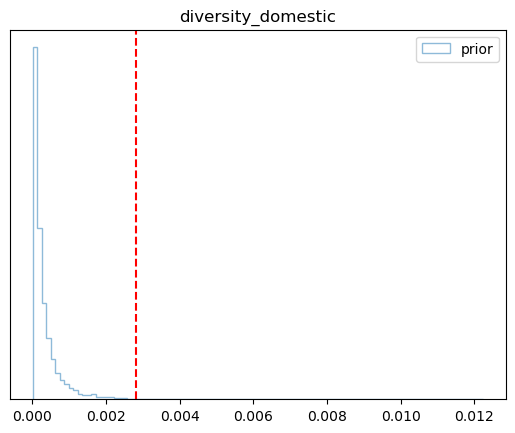

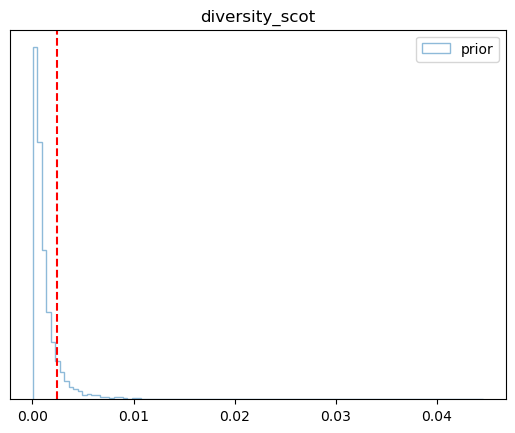

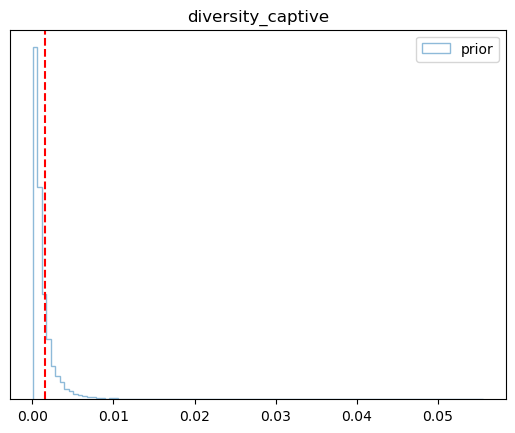

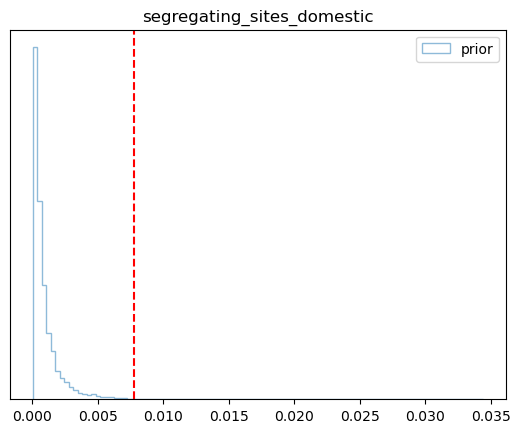

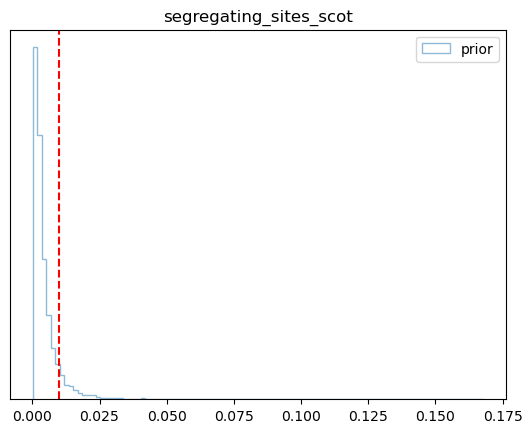

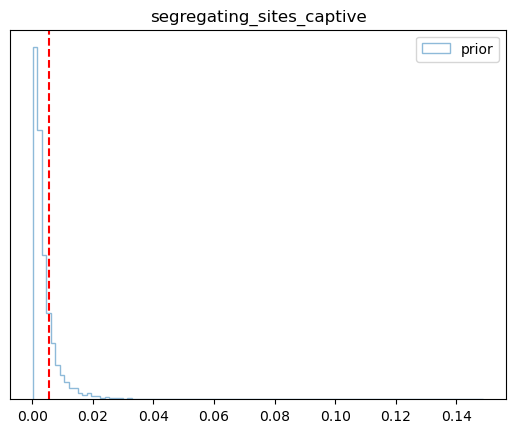

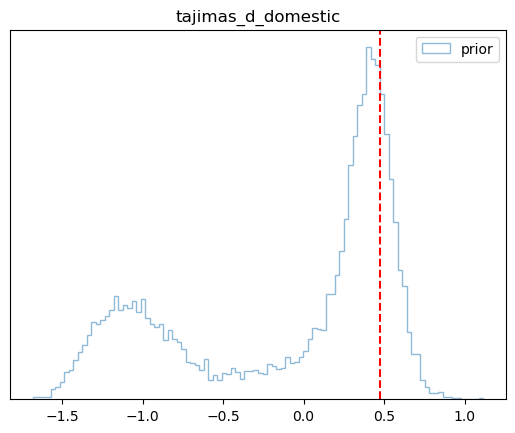

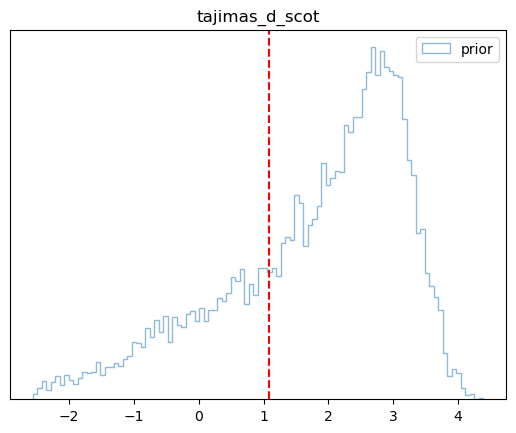

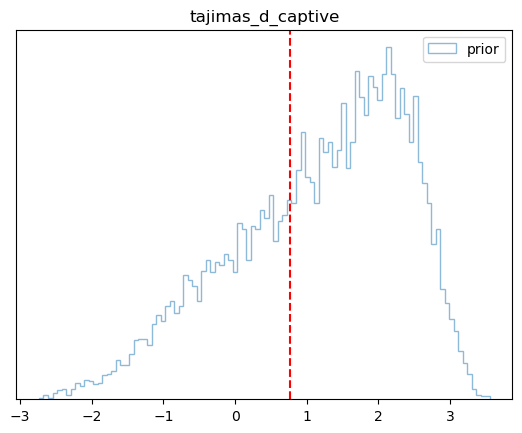

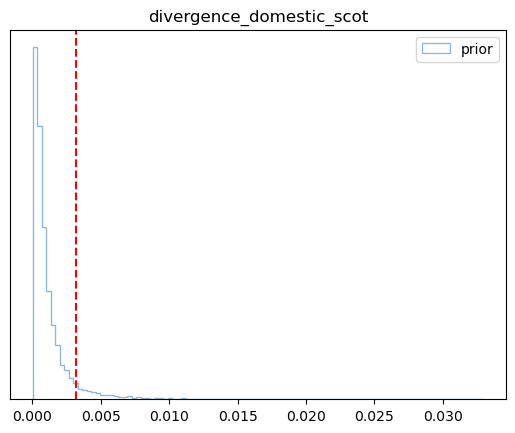

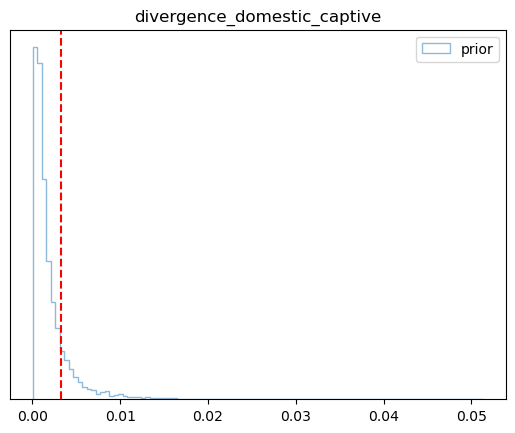

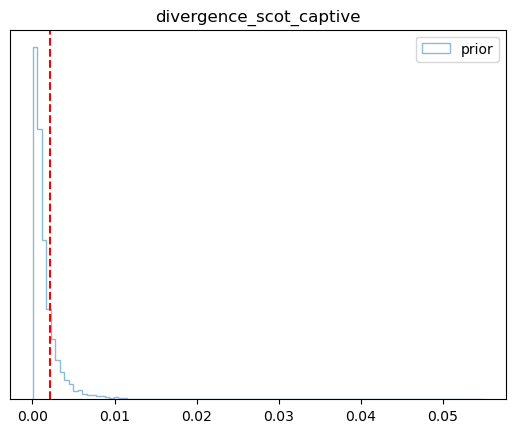

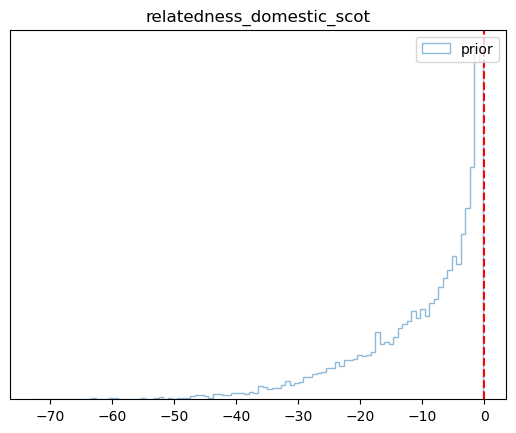

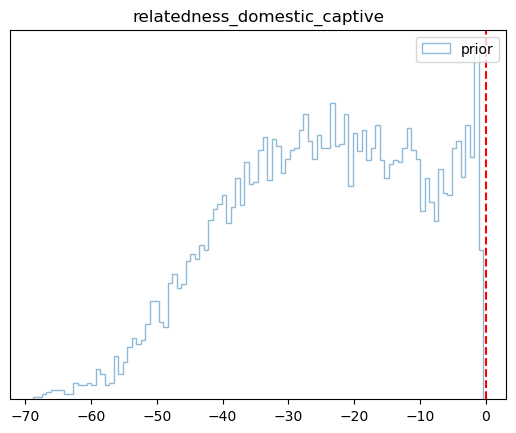

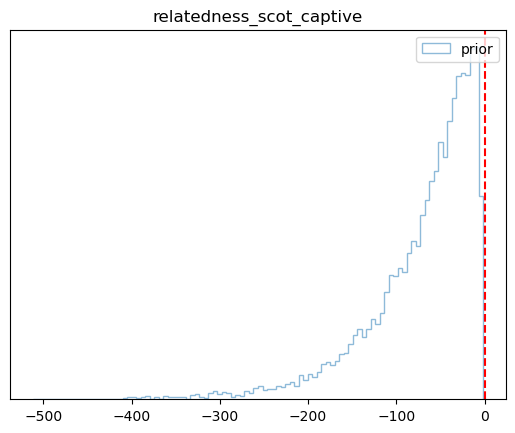

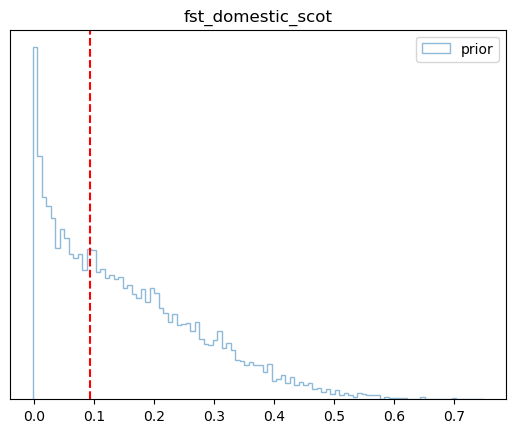

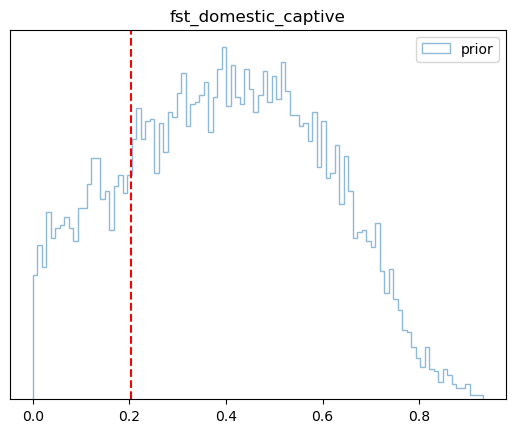

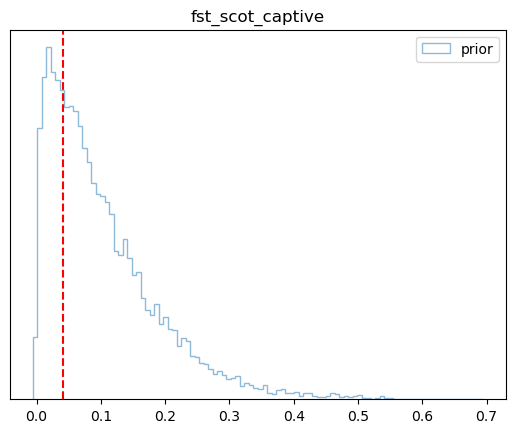

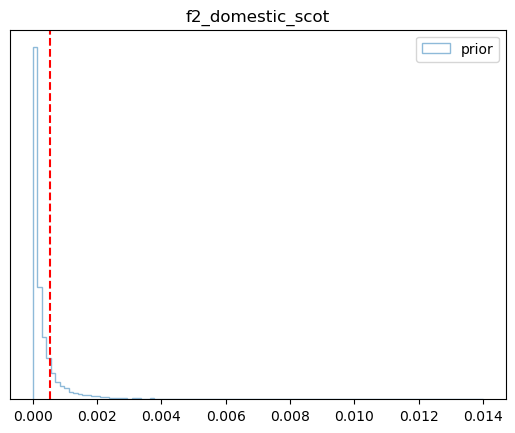

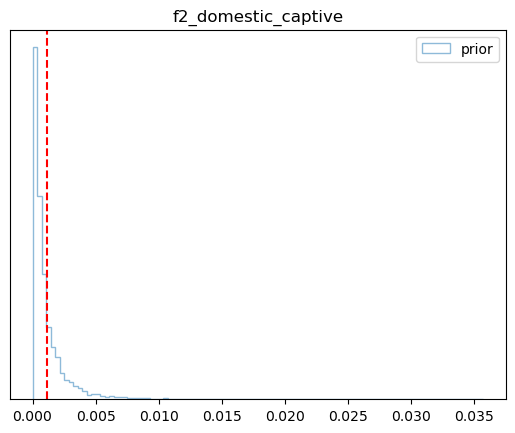

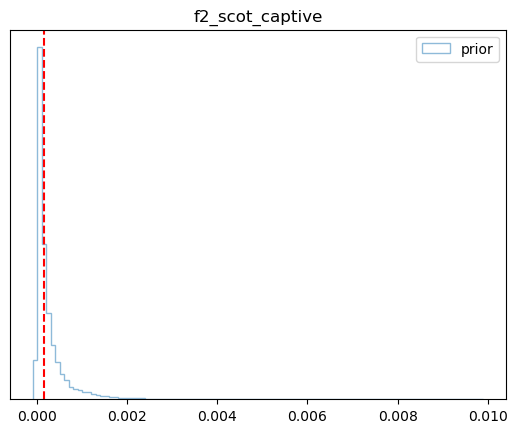

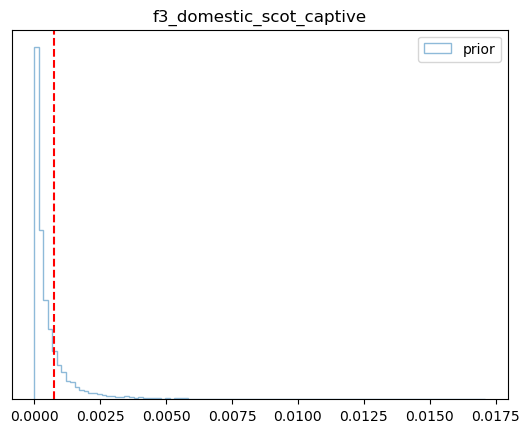

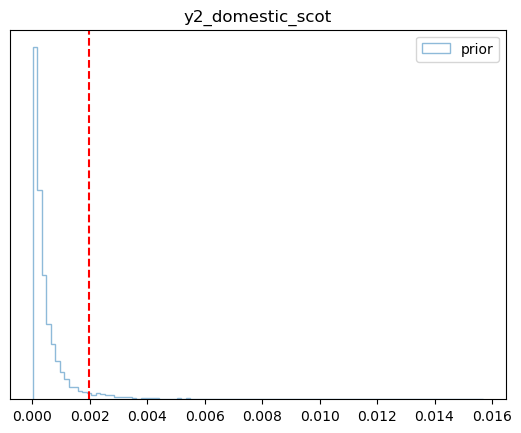

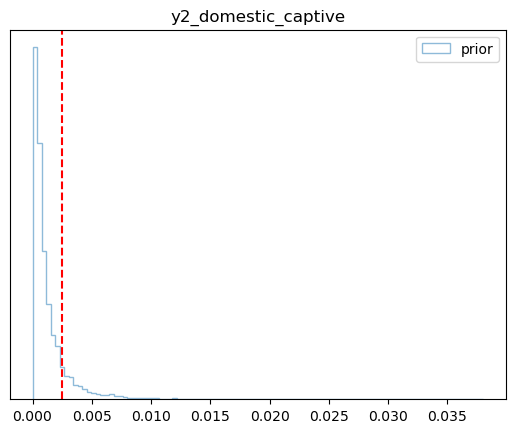

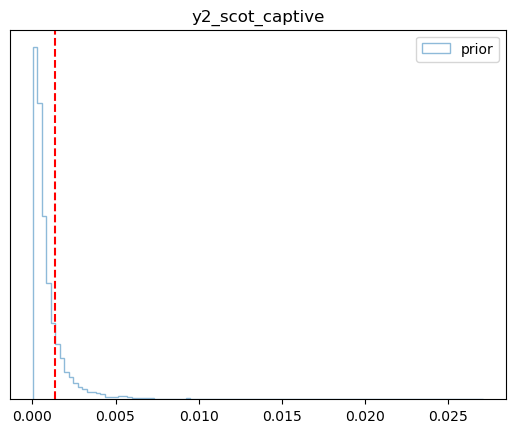

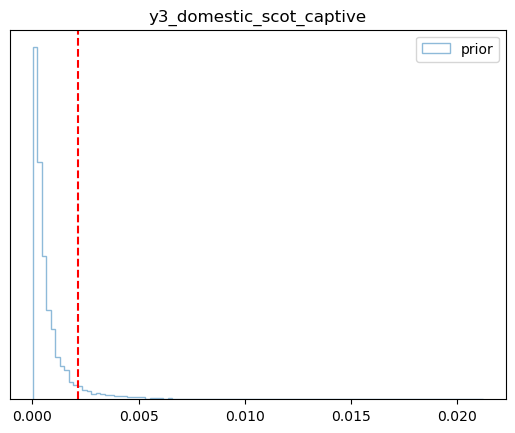

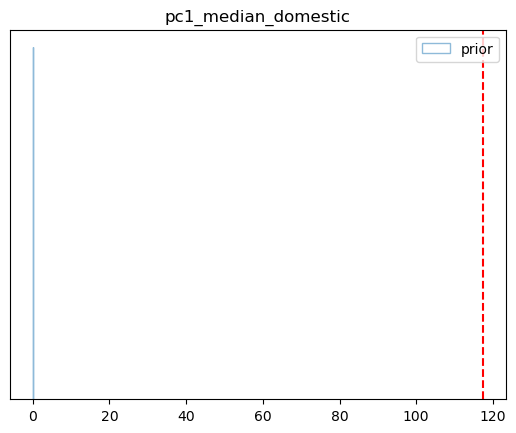

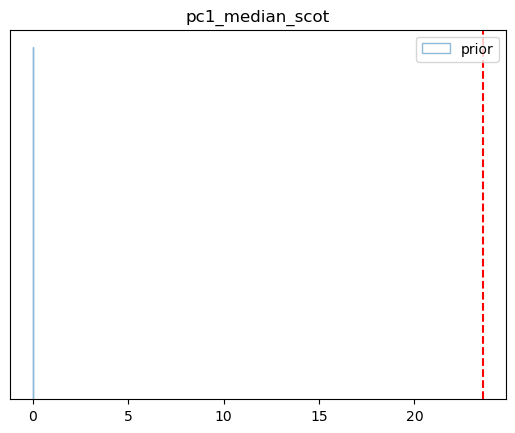

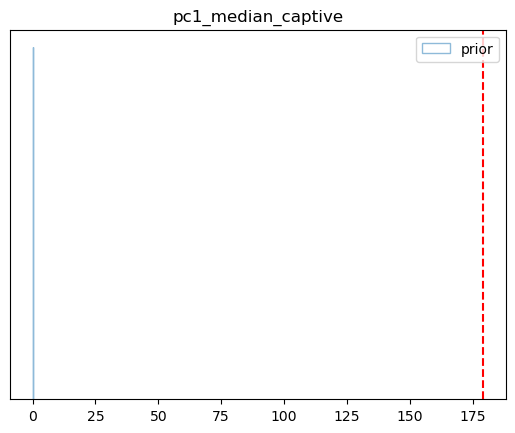

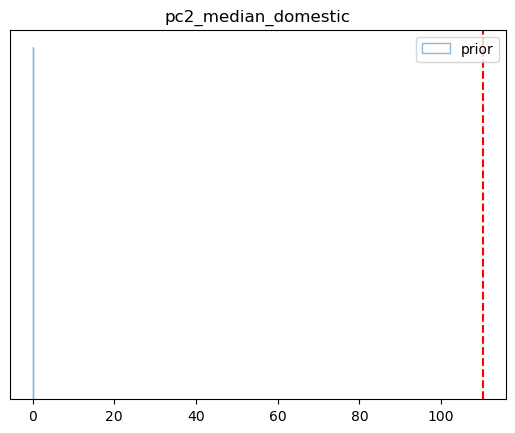

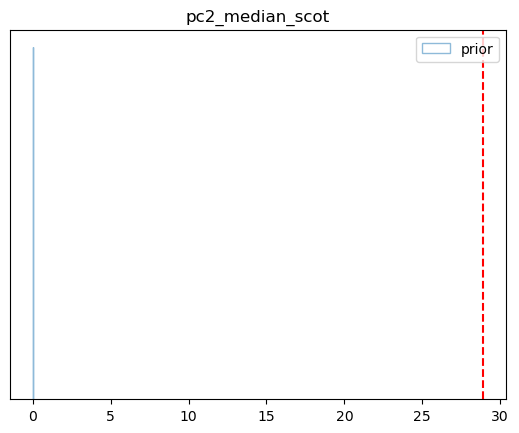

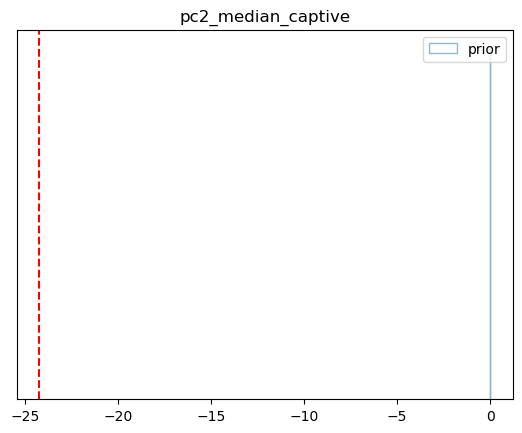

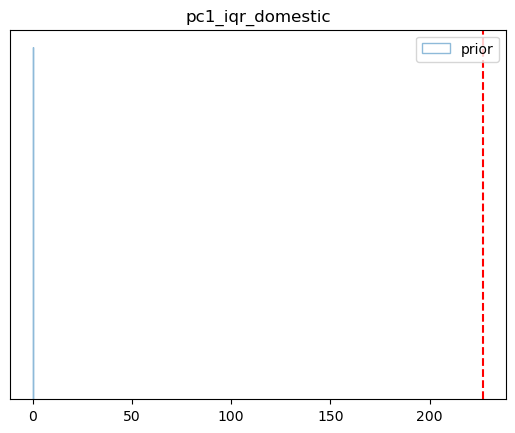

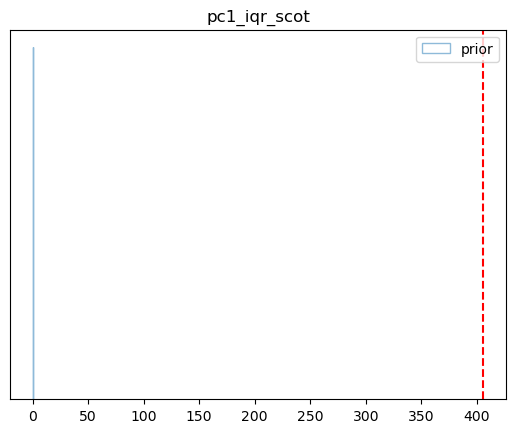

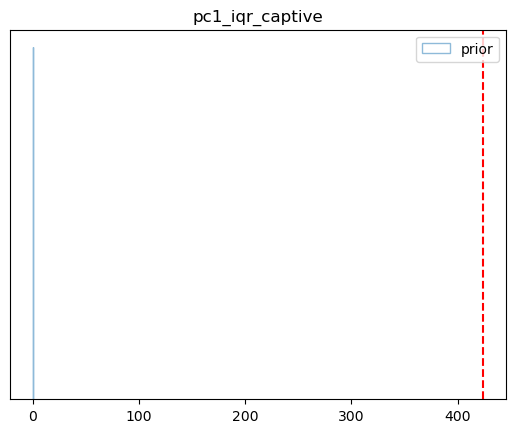

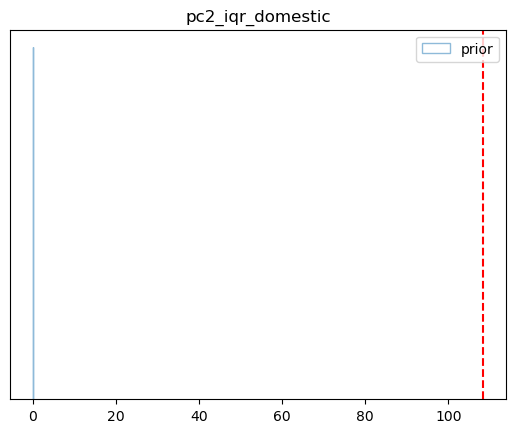

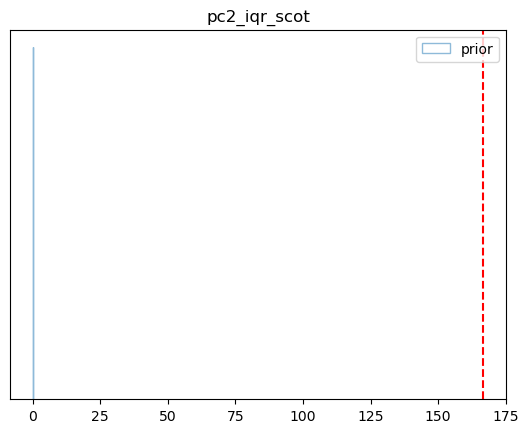

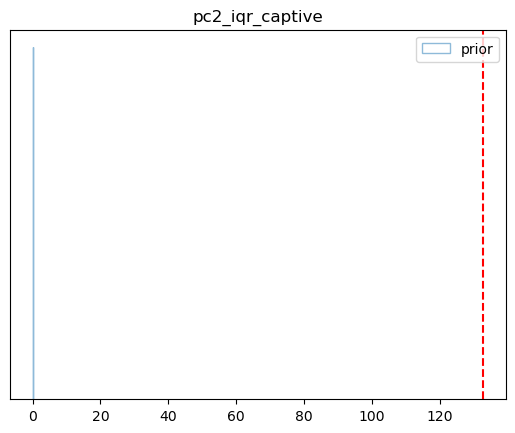

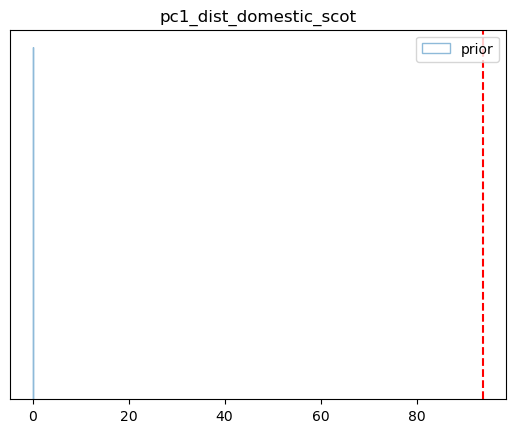

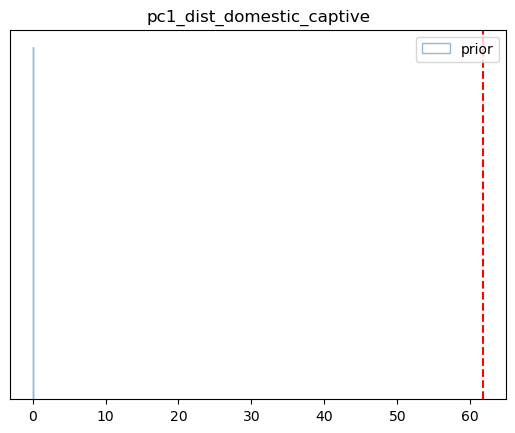

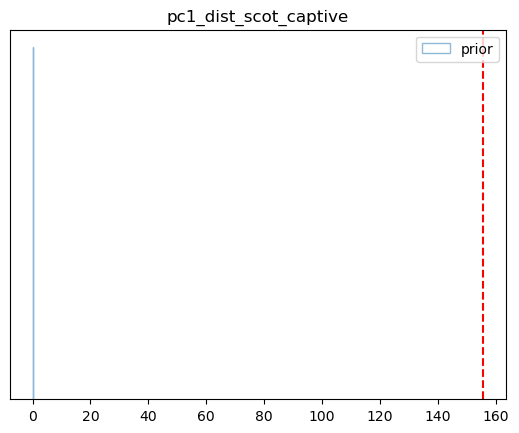

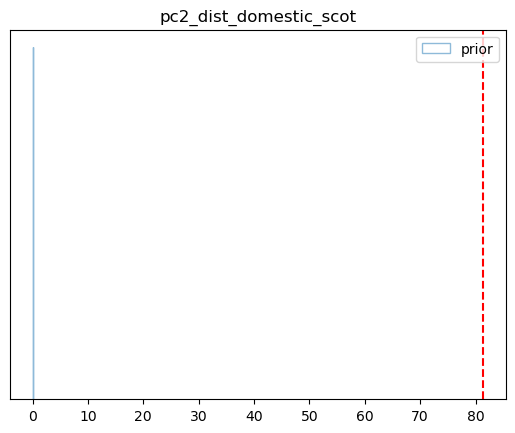

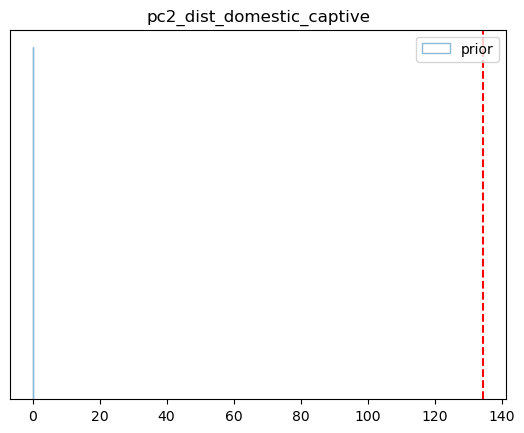

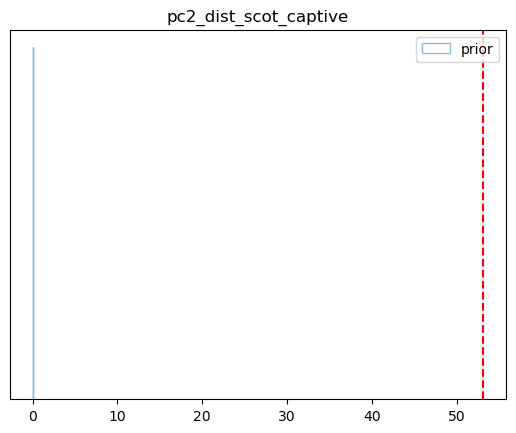

IndexError: index 44 is out of bounds for axis 1 with size 44

In [13]:
for num in range(0,len(x)-1):  
    plt.hist(x[:,num],
             alpha=0.5,
             label='prior', bins=100, density=True, histtype='step')

    #plt.hist(x2[:,num],
    #         alpha=0.5,
    #         label='r2', bins=100, density=True, histtype='step')

   # plt.hist(x3[:,num],
    #         alpha=0.5,
    #         label='r3', bins=100, density=True, histtype='step')
    
   # plt.hist(x4[:,num],
    #         alpha=0.5,
     #        label='r4', bins=100, density=True, histtype='step')
    
    plt.axvline(x=x_o[:,num], color='red', linestyle='--')

    plt.legend(loc='upper right')
    plt.title(stats[num])
    plt.yticks([])
    #plt.xlim(lims[num])
    plt.show()